# NOTEBOOK DE CALIBRACION DEL TRIGGER

# Trigger calibration notebook

This notebook is meant to be run on the RP.

This notebook aims to make some measurements with the RP oscilloscope to know if teh trigger is working properly. 
For each of the RP sampling rates (sr), a time length of the oscilloscope screen (ts) is associated:
1. sr = 125000000.0 Hz ------> ts = 0.000131072 s
1. sr = 62500000.0 Hz ------> ts = 0.000262144 s
1. sr = 31250000.0 Hz ------> ts = 0.000524288 s
1. sr = 15625000.0 Hz ------> ts = 0.001048576 s
1. sr = 7812500.0 Hz ------> ts = 0.002097152 s
1. sr = 3906250.0 Hz ------> ts = 0.004194304 s
1. sr = 1953125.0 Hz ------> ts = 0.008388608 s
1. sr = 976562.5 Hz ------> ts = 0.016777216 s
1. sr = 488281.25 Hz ------> ts = 0.033554432 s
1. sr = 244140.625 Hz ------> ts = 0.067108864 s
1. sr = 122070.3125 Hz ------> ts = 0.134217728 s
1. sr = 61035.15625 Hz ------> ts = 0.268435456 s
1. sr = 30517.578125 Hz ------> ts = 0.536870912 s
1. sr = 15258.7890625 Hz ------> ts = 1.073741824 s
1. sr = 7629.39453125 Hz ------> ts = 2.147483648 s
1. sr = 3814.697265625 Hz ------> ts = 4.294967296 s
1. sr = 1907.3486328125 Hz ------> ts = 8.589934592 s.

For each ts, an oscilloscope screen of time length tl=trunc(ts, first 2 nonzero values) a sawtooth wave with frequency f=1/(3tl) will be fed to the RP CH1, such that one tooth occupies 3 screens.
The trigger wil be set to level 0 with negative edge and the trigger position to the values [-3, -2, -1, 0]
If the different triggered screens are aligned properly then we know the trigger and trigger_position works as intended.
The data acquired will be saved on the RP at /root/data/trigger_position_calibration.


#### instantiation and burocracy

In [1]:
import sys
sys.path.append('/opt/redpitaya/lib/python')

In [2]:
import redpipy as rpp
from redpipy.rpwrap import acq
import rp
import matplotlib.pyplot as plt
rp.rp_InitReset(True)

osc = rpp.osci.Oscilloscope()
osc.channel1.enabled = True
osc.channel1.set_gain(20)
osc.configure_trigger(level=0, positive_edge=False)
print(osc.get_trigger_settings())
trigger_delays = range(1,4)
data_path = "/root/data/trigger_position_calibration"

{'source': 'ch1', 'level': 0.0, 'positive_edge': False}


In [3]:
import math

def run_experiment(tl, f, exp_num):
    for trigger_delay in trigger_delays:
        trace_duration = osc.set_timebase(tl)
        osc.set_trigger_delay(trigger_delay)
        osc.arm_trigger()
        df = osc.get_data()
        df.attrs["screen_time_length"] = tl
        df.attrs["sawtooth_frequency"] = f
        df.attrs["sampling_rate"] = acq.get_sampling_rate_hz()
        df.attrs["trigger_delay"] = trigger_delay
        df.to_pickle(f"{data_path}/{exp_num}/tl{tl}_f{f}_tdly{trigger_delay}.pickle")
        plt.plot(df["time"], df["ch1"], '.')
    return df

def truncate(num, places):
    reference = 10**(places -1)
    decimated = 0
    if num > reference:
        while num/10 >= reference*10:
            num = num/10
            decimated -=1
        num = num/10
        decimated -=1
    else:
        while num*10 <= reference:
            num = num*10
            decimated += 1
        num = num*10
        decimated += 1
    return int(num)/(10**decimated)


In [4]:
msr = 125e6
buff_size = 2**14
sampling_rates = [msr/(2**dec) for dec in range(17)]
time_lines = [truncate(buff_size/sr, 2) for sr in sampling_rates]
frequencies = [1/(3*tl) for tl in time_lines]
exp_numbers = [str(num).zfill(2) for num in range(1, 18)]
print(sampling_rates)
print(time_lines)
print(frequencies)
print(exp_numbers)

[125000000.0, 62500000.0, 31250000.0, 15625000.0, 7812500.0, 3906250.0, 1953125.0, 976562.5, 488281.25, 244140.625, 122070.3125, 61035.15625, 30517.578125, 15258.7890625, 7629.39453125, 3814.697265625, 1907.3486328125]
[0.00013, 0.00026, 0.00052, 0.001, 0.002, 0.0041, 0.0083, 0.016, 0.033, 0.067, 0.13, 0.26, 0.53, 1.0, 2.1, 4.2, 8.5]
[2564.1025641025644, 1282.0512820512822, 641.0256410256411, 333.3333333333333, 166.66666666666666, 81.30081300813006, 40.16064257028113, 20.833333333333332, 10.1010101010101, 4.975124378109452, 2.564102564102564, 1.282051282051282, 0.6289308176100629, 0.3333333333333333, 0.15873015873015872, 0.07936507936507936, 0.0392156862745098]
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17']


#### 1) sr=125e6, tl=0.00013, f=2564.1

set frequency to 2564.1025641025644 


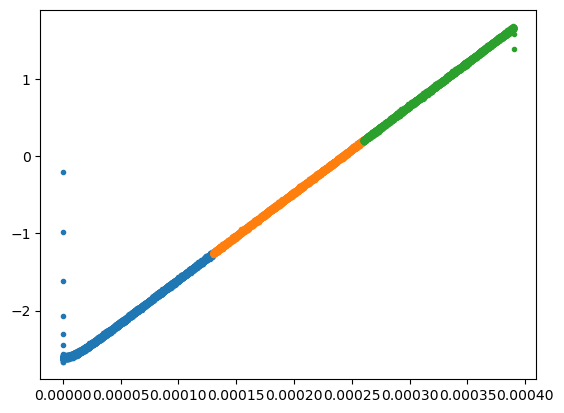

set frequency to 1282.0512820512822 


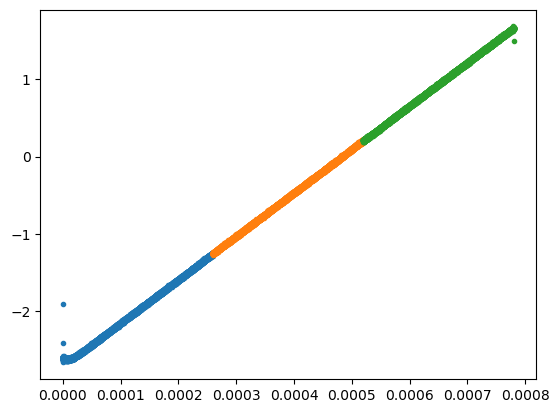

set frequency to 641.0256410256411 


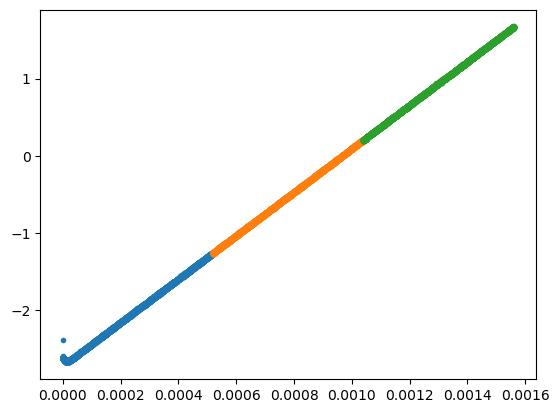

set frequency to 333.3333333333333 


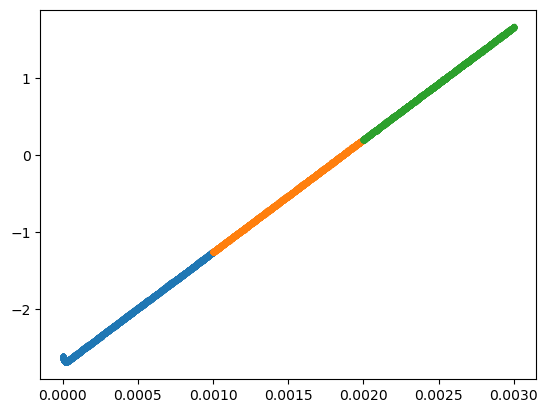

set frequency to 166.66666666666666 


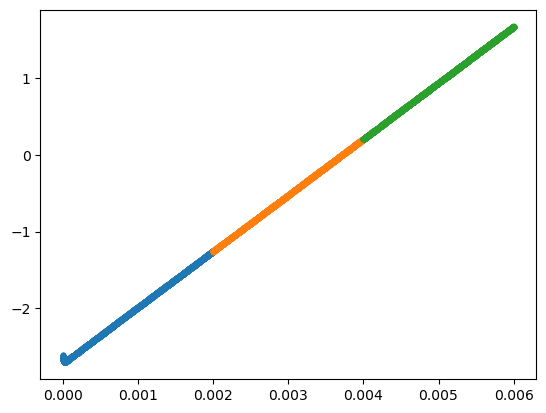

set frequency to 81.30081300813006 


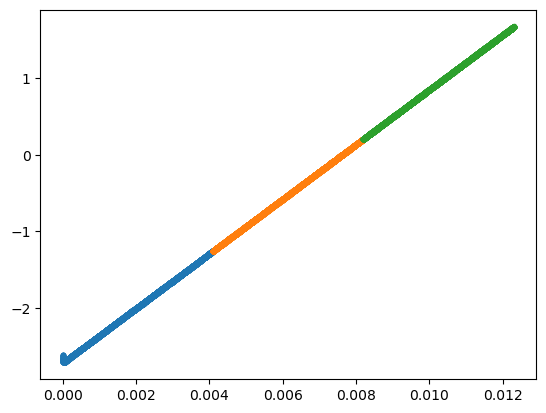

set frequency to 40.16064257028113 


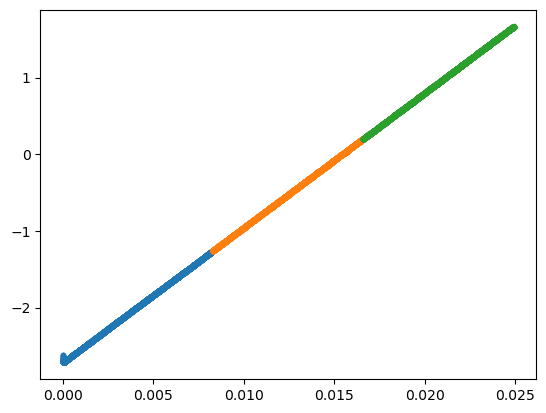

set frequency to 20.833333333333332 


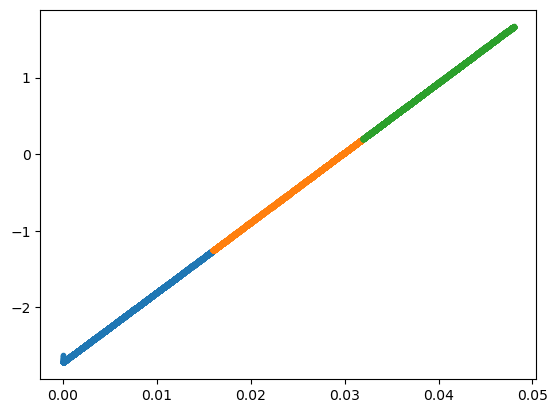

set frequency to 10.1010101010101 


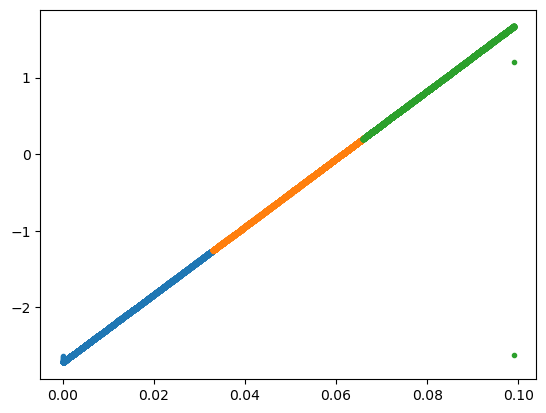

set frequency to 4.975124378109452 


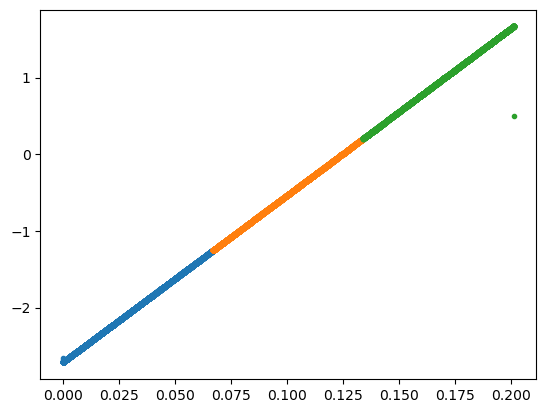

set frequency to 2.564102564102564 


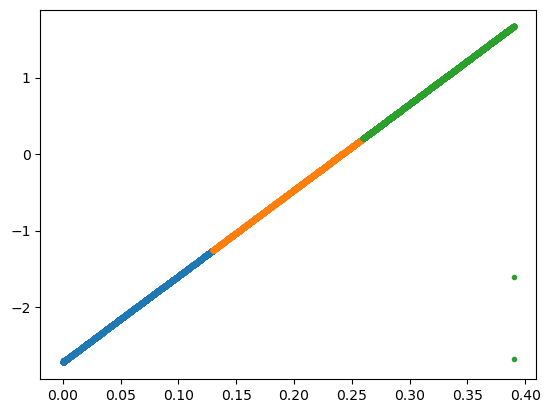

set frequency to 1.282051282051282 


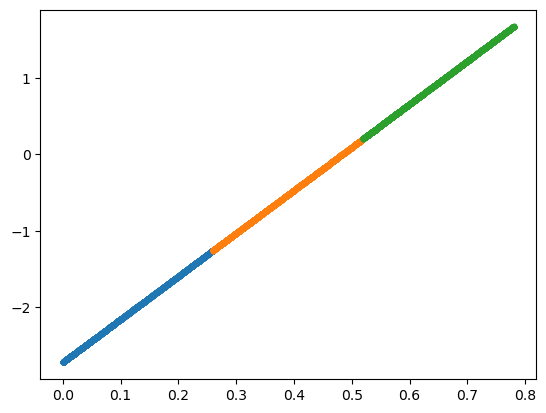

set frequency to 0.6289308176100629 


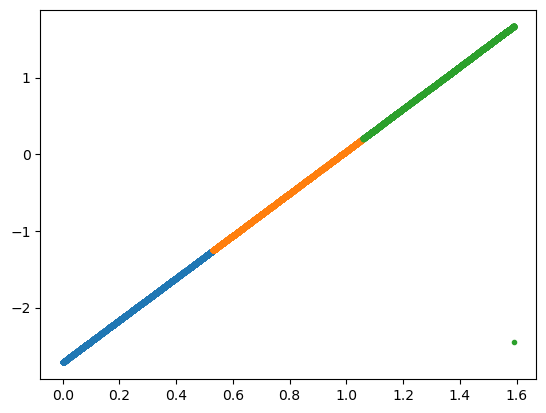

set frequency to 0.3333333333333333 


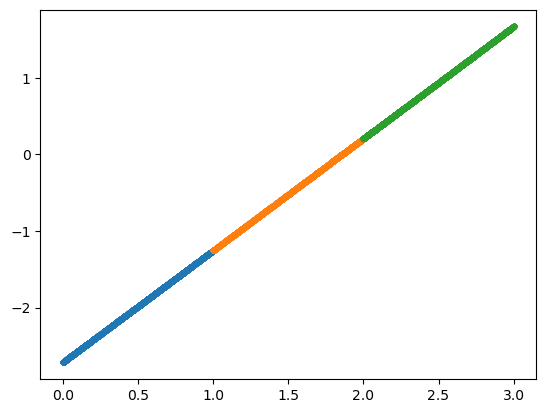

set frequency to 0.15873015873015872 


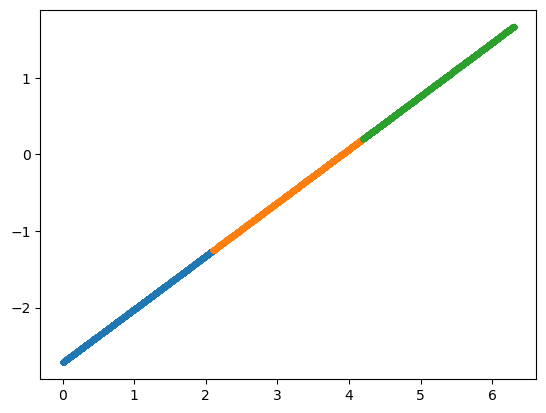

set frequency to 0.07936507936507936 


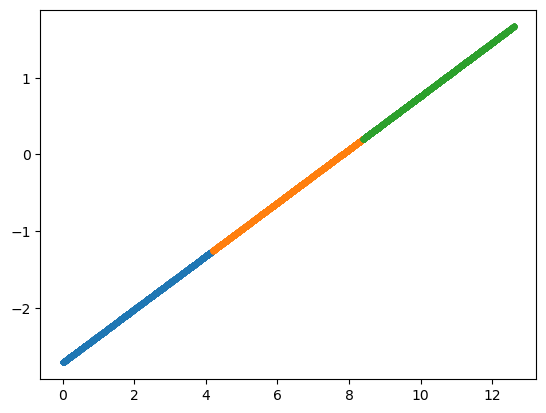

set frequency to 0.0392156862745098 


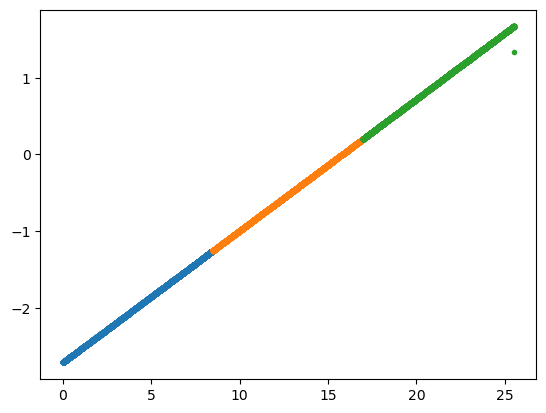

In [5]:
for tl, f, exp_num in zip(time_lines, frequencies, exp_numbers):
    acq.set_trigger_hyst(0.5)
    print(input(f"set frequency to {f}"))
    run_experiment(tl, f, exp_num)
    plt.show()

2) sr=62500000.0, tl=0.00026, f=1282.051

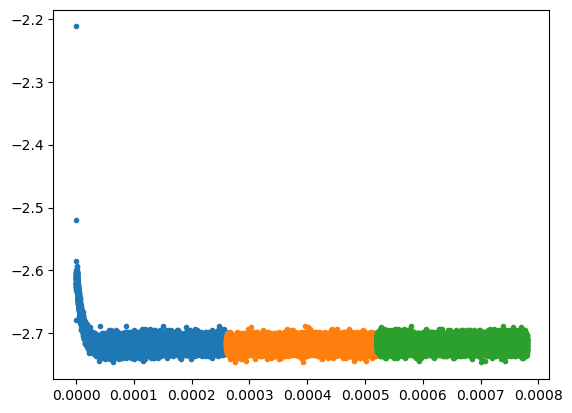

In [6]:
tl = 0.00026
f = 1282.051
exp_num = "02"
acq.set_trigger_hyst(0.5)
run_experiment(tl, f, exp_num)
plt.show()

3) sr=31250000.0, tl=0.00052, f=641.025

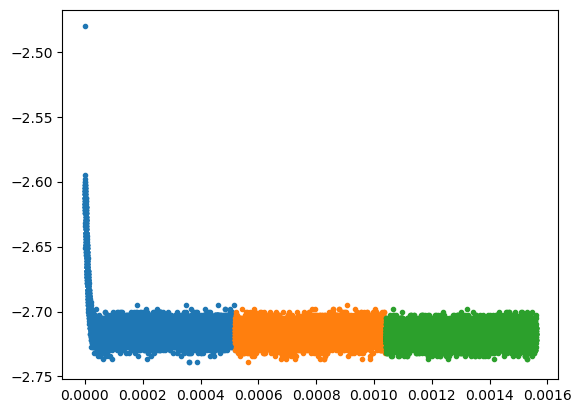

In [7]:
tl = 0.00052
f = 641.025
exp_num = "03"
acq.set_trigger_hyst(0.5)
run_experiment(tl, f, exp_num)
plt.show()

4)